# Background and Context:

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

# Problem Statement:

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective :

To predict which customer is more likely to purchase the newly introduced travel package.

# Data Dictionary:

# Customer details:

1. CustomerID: Unique customer ID

2. ProdTaken: Product taken flag

3. Age: Age of customer

4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

5. CityTier: City tier
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisited: Total number of person came with customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of the trip in a year by customer
12. Passport: The customer has passport or not
13. OwnCar: Customers owns a car flag
14. NumberOfChildrenVisited: Total number of children visit with customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer


# Customer interaction Data:
17. PitchSatisfactionScore: Sales pitch satisfactory score

18. ProductPitched: Product pitched by a salesperson

19. NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
20. DurationOfPitch: Duration of the pitch by a salesman to customer


# Import neccesary Libaries :

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

# Load data:

In [2]:
data = pd.read_csv("Tourism.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
data.tail()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Super Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Multi,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Multi,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Multi,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [7]:
print(df.columns)

Index(['CustomerID', 'ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')


* Column names look ok .

In [8]:
# let us look at the shape of the data
df.shape

(4888, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

Observations:
* The dataset consists of 14 numeric variables with 7 int and 7 float variables and 6 objects are seen in the dataset.

In [10]:
# Summary of dataset
df.describe(include='all')

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4863,4888.000000,4637.000000,4888,4888,4888.000000,4843.000000,4888,4862.000000,4888,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4888,4655.000000
unique,NaN,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Multi,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,3444,NaN,NaN,2368,2916,NaN,NaN,1842,NaN,2340,NaN,NaN,NaN,NaN,NaN,1842,NaN
mean,202443.500000,0.188216,37.622265,NaN,1.654255,15.490835,NaN,NaN,2.905074,3.708445,NaN,3.581037,NaN,3.236521,0.290917,3.078151,0.620295,1.187267,NaN,23619.853491
std,1411.188388,0.390925,9.316387,NaN,0.916583,8.519643,NaN,NaN,0.724891,1.002509,NaN,0.798009,NaN,1.849019,0.454232,1.365792,0.485363,0.857861,NaN,5380.698361
min,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,201221.750000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20346.000000
50%,202443.500000,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22347.000000
75%,203665.250000,0.000000,44.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25571.000000


Observations:

    *  The PreferredLoginDevice has 2 unique values , Occupation variable has 4 unique values , Gender variable has 3 unique values ,ProductPitched variable has 5 unique values , MaritalStatus has 4 unique values and Designation has 5 unique values.
    * There are 6 objects present in this dataset which needs to be converted to categorical variables.
    

# Coversion of Objects to categorical variables:

In [27]:
df['PreferredLoginDevice'] = df.PreferredLoginDevice.astype('category')
df['Occupation'] = df.Occupation.astype('category')
df['Gender'] = df.Gender.astype('category')
df['ProductPitched'] = df.ProductPitched.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')
df['Designation'] = df.Designation.astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   int64   
 2   Age                      4888 non-null   float64 
 3   PreferredLoginDevice     4863 non-null   category
 4   CityTier                 4888 non-null   int64   
 5   DurationOfPitch          4888 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   int64   
 9   NumberOfFollowups        4888 non-null   float64 
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4888 non-null   float64 
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4888 non-null   float64 
 14  Passport

# Check for Missing Values :

In [11]:
# Check for missing values
df.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
PreferredLoginDevice        25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

Observations:
    *  The Monthly Income , DurationOfPitch and Age variables are having higher number of missing values .
    * Dependent (or) target variable in this dataset is ProdTaken which dont have any missing values 
    * Number of Trips , Number of Followups and PreferredPropertyStar have 140, 45 and 26 missing values in total respectively.

# Fixing Missing Values :

In [12]:
# we will replace missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

# Check for unique values :

In [13]:
# Check the unique values in each column of the dataframe.
df.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
PreferredLoginDevice          2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

# Check for Duplicates:

In [15]:
df[df.duplicated()].count()

CustomerID                 0
ProdTaken                  0
Age                        0
PreferredLoginDevice       0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

* There are no duplicates in the dataset.

# Univariate Analysis:

In [28]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# Observations on Age:

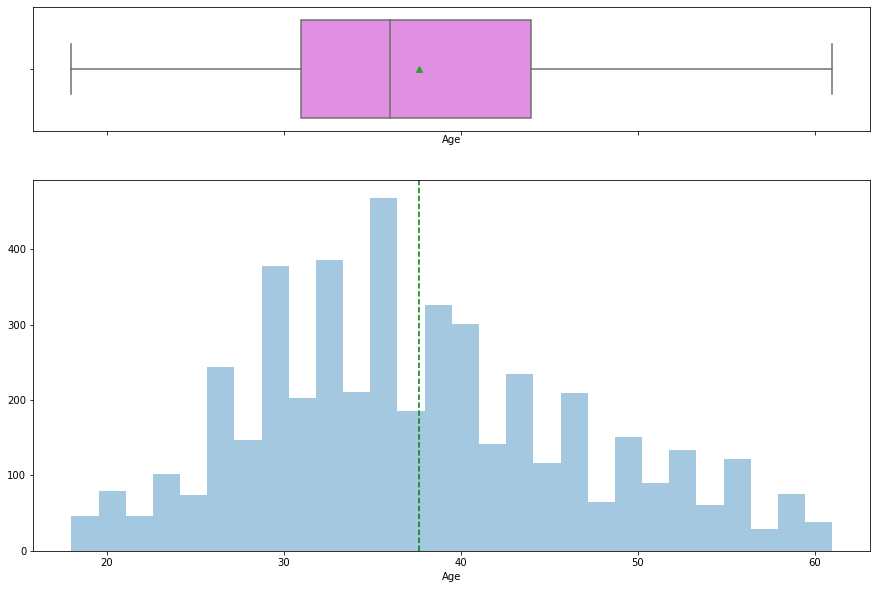

In [18]:
histogram_boxplot(data["Age"])

**Observation**

- Age is not skewed and the mean is around 40 years.
-  There are no outliers

# Observations on NumberOfChildrenVisited:

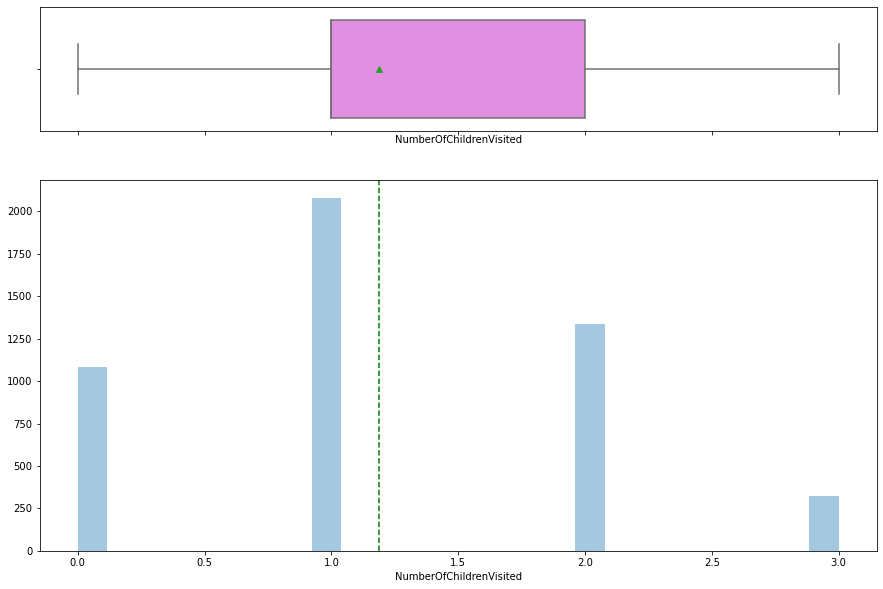

In [23]:
histogram_boxplot(data["NumberOfChildrenVisited"])

Observations:
    *  Atleast one child will accompany the customer.

# Observations on MonthlyIncome:

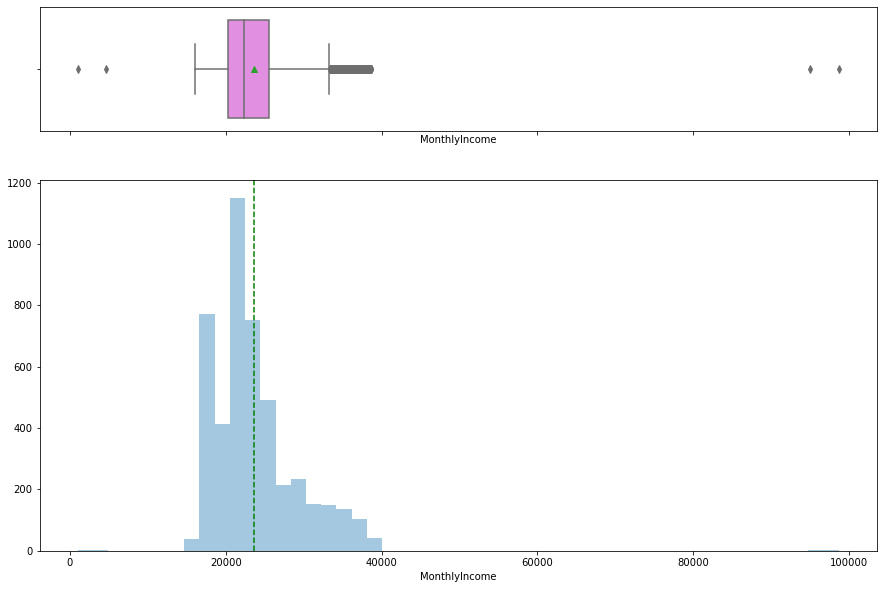

In [24]:
histogram_boxplot(data["MonthlyIncome"]) 

Observations:
    * The gross monthly income lies above 2000 and betwwen 2000 to 4000.

# Observations on NumberOfTrips:

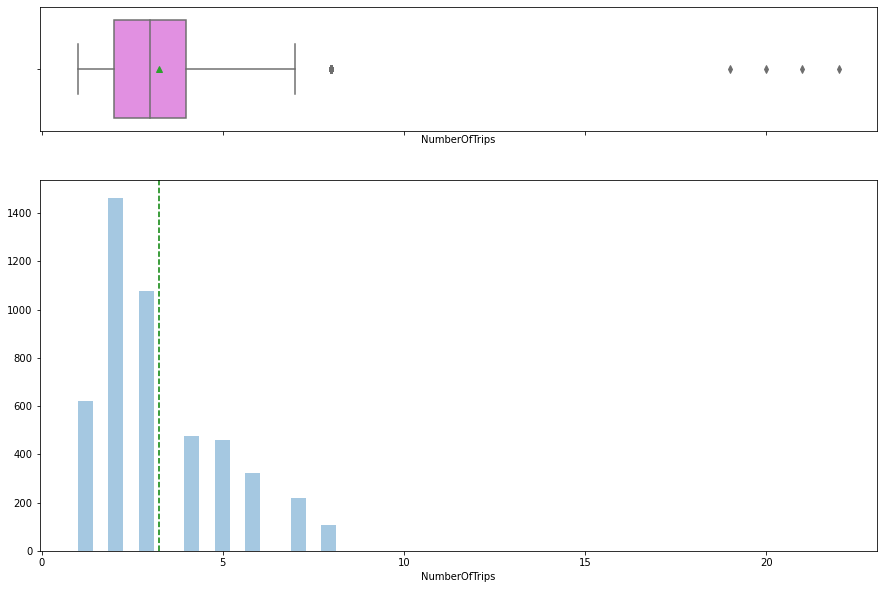

In [25]:
histogram_boxplot(data["NumberOfTrips"]) 

Observations:
    * Most of the customers come between 1 to 5 times the no of trips to the tourist company.

# Observations on Passport:

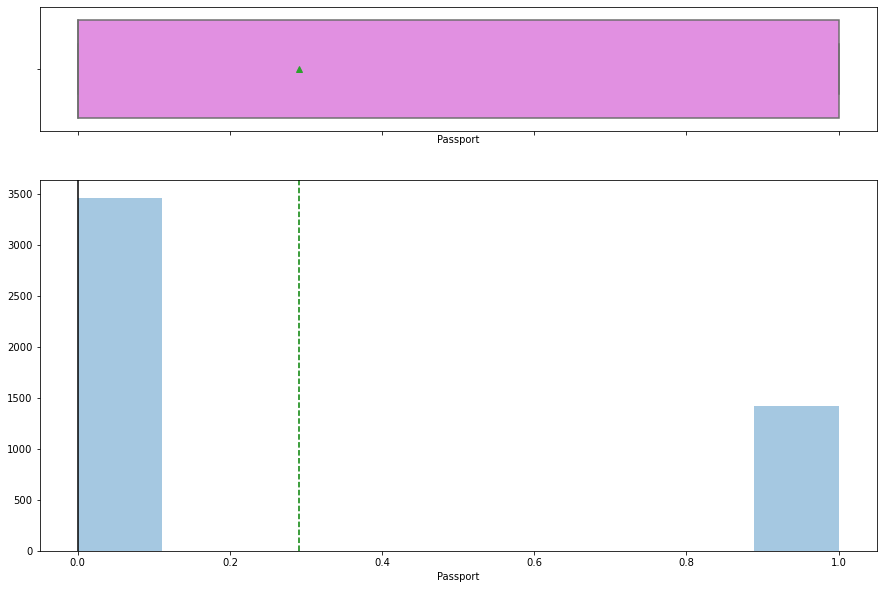

In [31]:
histogram_boxplot(data["Passport"]) 

# Observations on NumberOfFollowups:

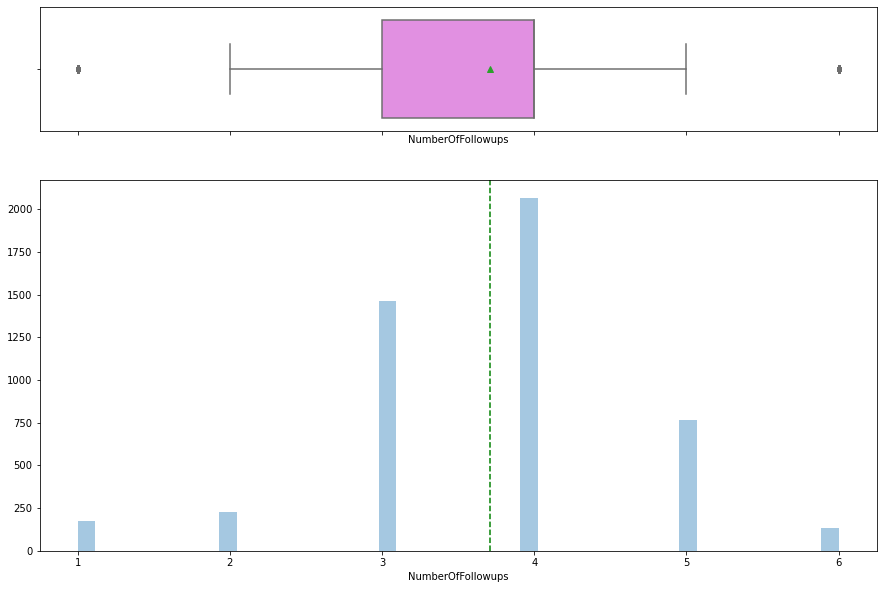

In [32]:
histogram_boxplot(data["NumberOfFollowups"]) 

Observations:
    * The number of followups by the salesperson are mostly about between 3 to 4 followups .

# Observations on PitchSatisfactionScore:

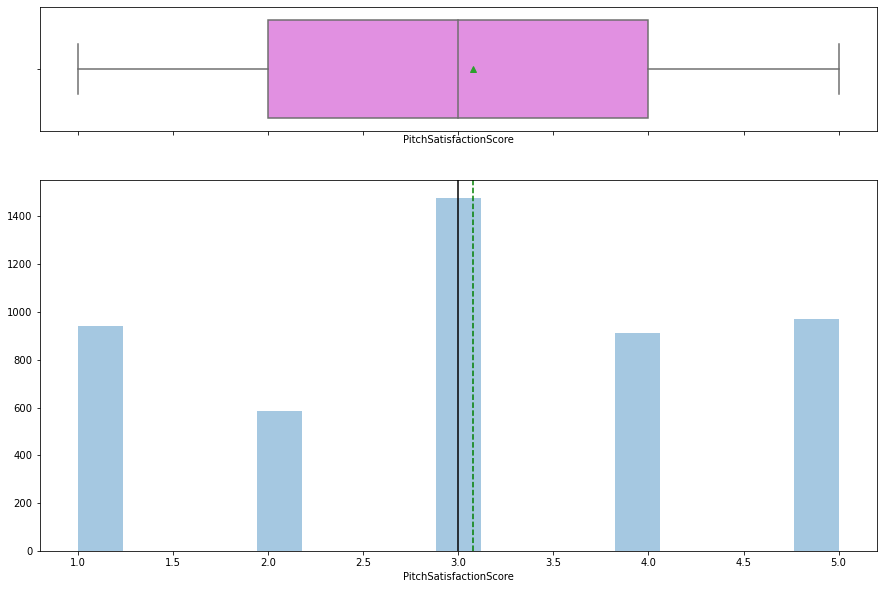

In [34]:
histogram_boxplot(data["PitchSatisfactionScore"])

Observations:
    * The PitchSatisfactionScore is around 3.0 at the maximum.

# Observations on NumberOfPersonVisited:

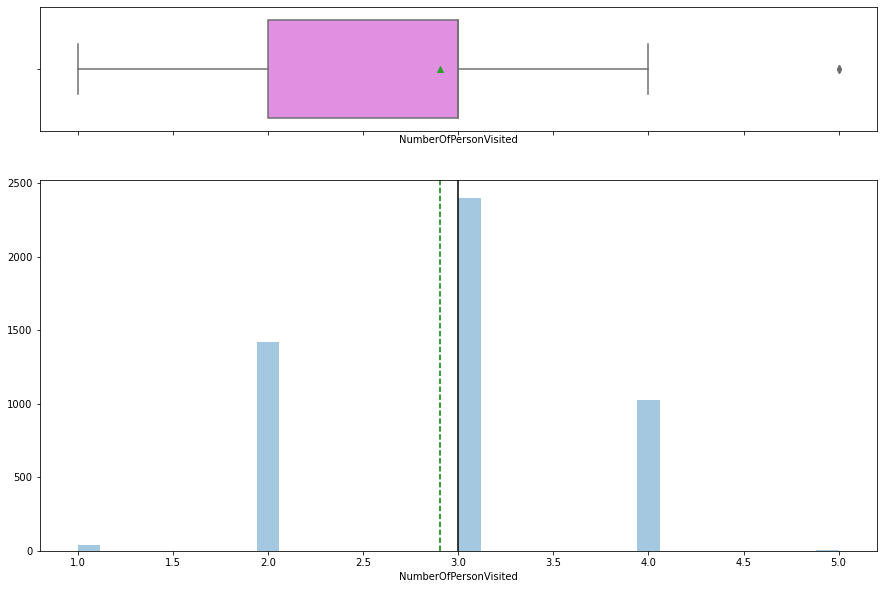

In [35]:
histogram_boxplot(data["NumberOfPersonVisited"])

Observations:
    * At the maximum about 3 people accompany the customer to the tourist company.

In [37]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

# Observations on OwnCar:

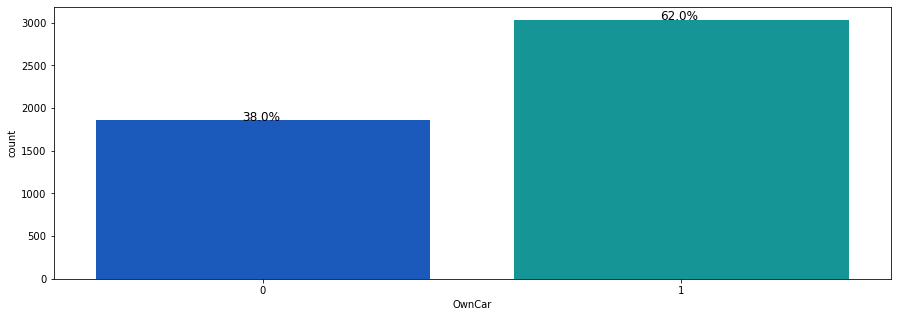

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["OwnCar"],palette='winter')
perc_on_bar(ax,df["OwnCar"])

*Most of the customers own a car .

# Observations on Passport:

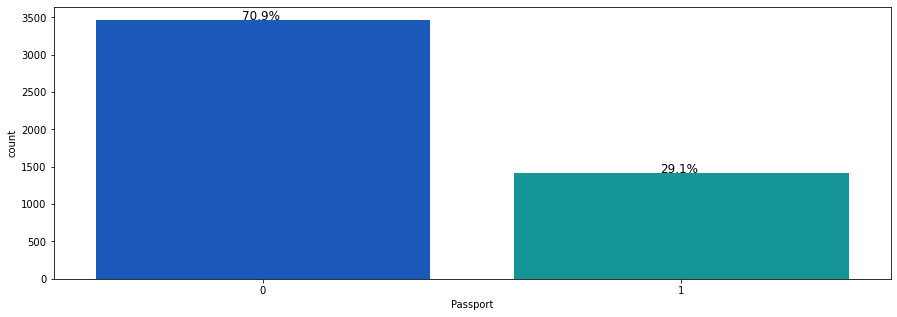

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Passport"],palette='winter')
perc_on_bar(ax,df["Passport"])

# Observations on Gender:

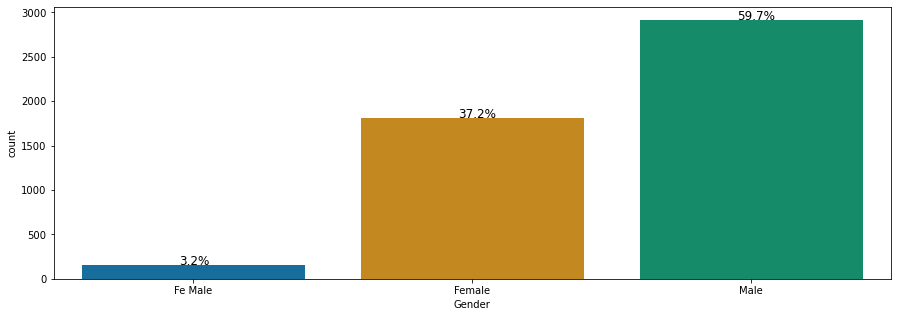

In [46]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Gender"],palette='colorblind')
perc_on_bar(ax,df["Gender"])

# Observations on Prodtaken:

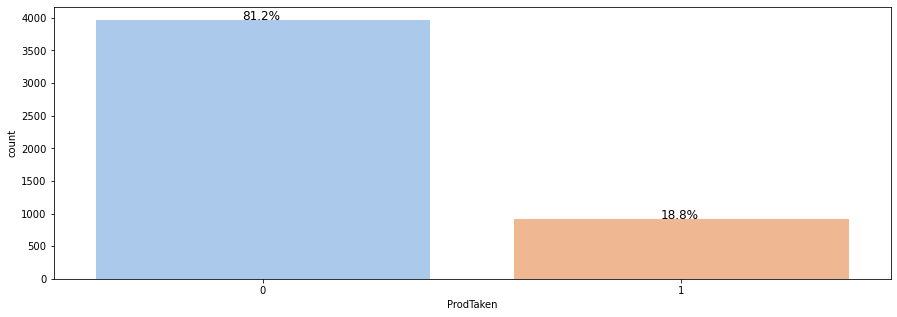

In [45]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["ProdTaken"],palette='pastel')
perc_on_bar(ax,df["ProdTaken"])

Observations:
    * Most of the customers took Product 0.

# Observations on MaritalStatus:

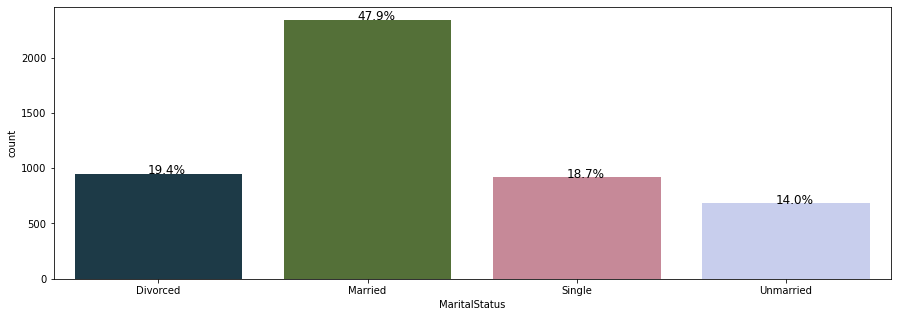

In [48]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["MaritalStatus"],palette='cubehelix')
perc_on_bar(ax,df["MaritalStatus"])

Observations:
    * Maximum of the customers are married .

# Bivariate Distributions

# HeatMap:

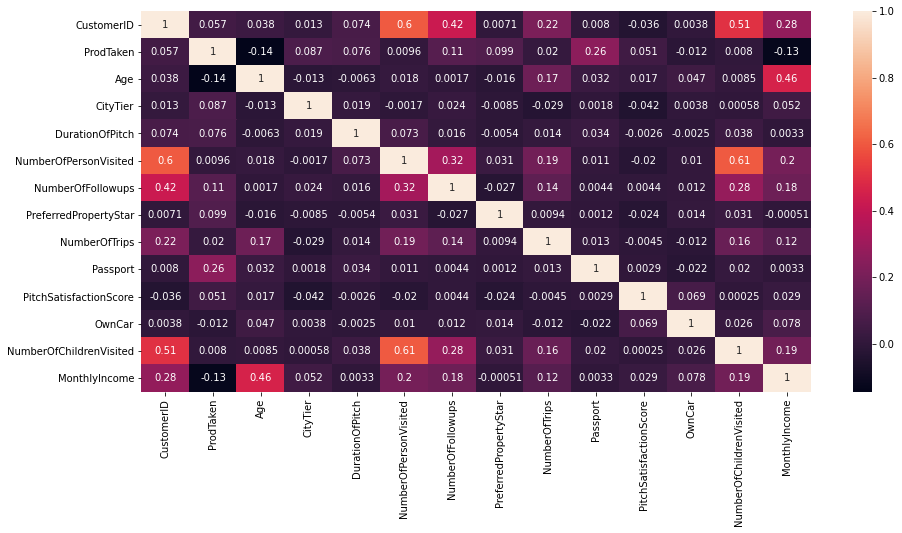

In [49]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Age Vs Income:

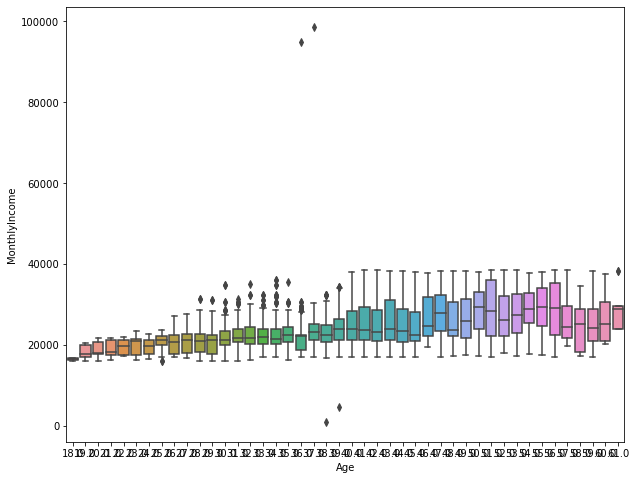

In [55]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Age'],df['MonthlyIncome'])
plt.show()

Monthly Income increases with the increase in Age .

# Gender Vs PitchSatisfactoryScore

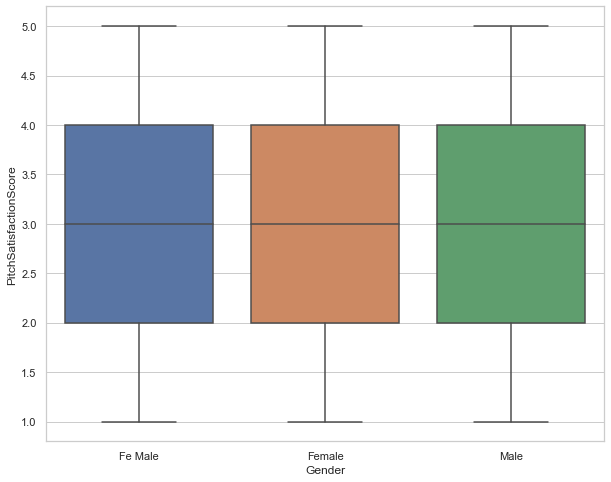

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Gender'],df['PitchSatisfactionScore'])
plt.show()

* Satifactory score ranges from 2 - 4 across both genders.

# Pairplot for the target variable ProdTaken:

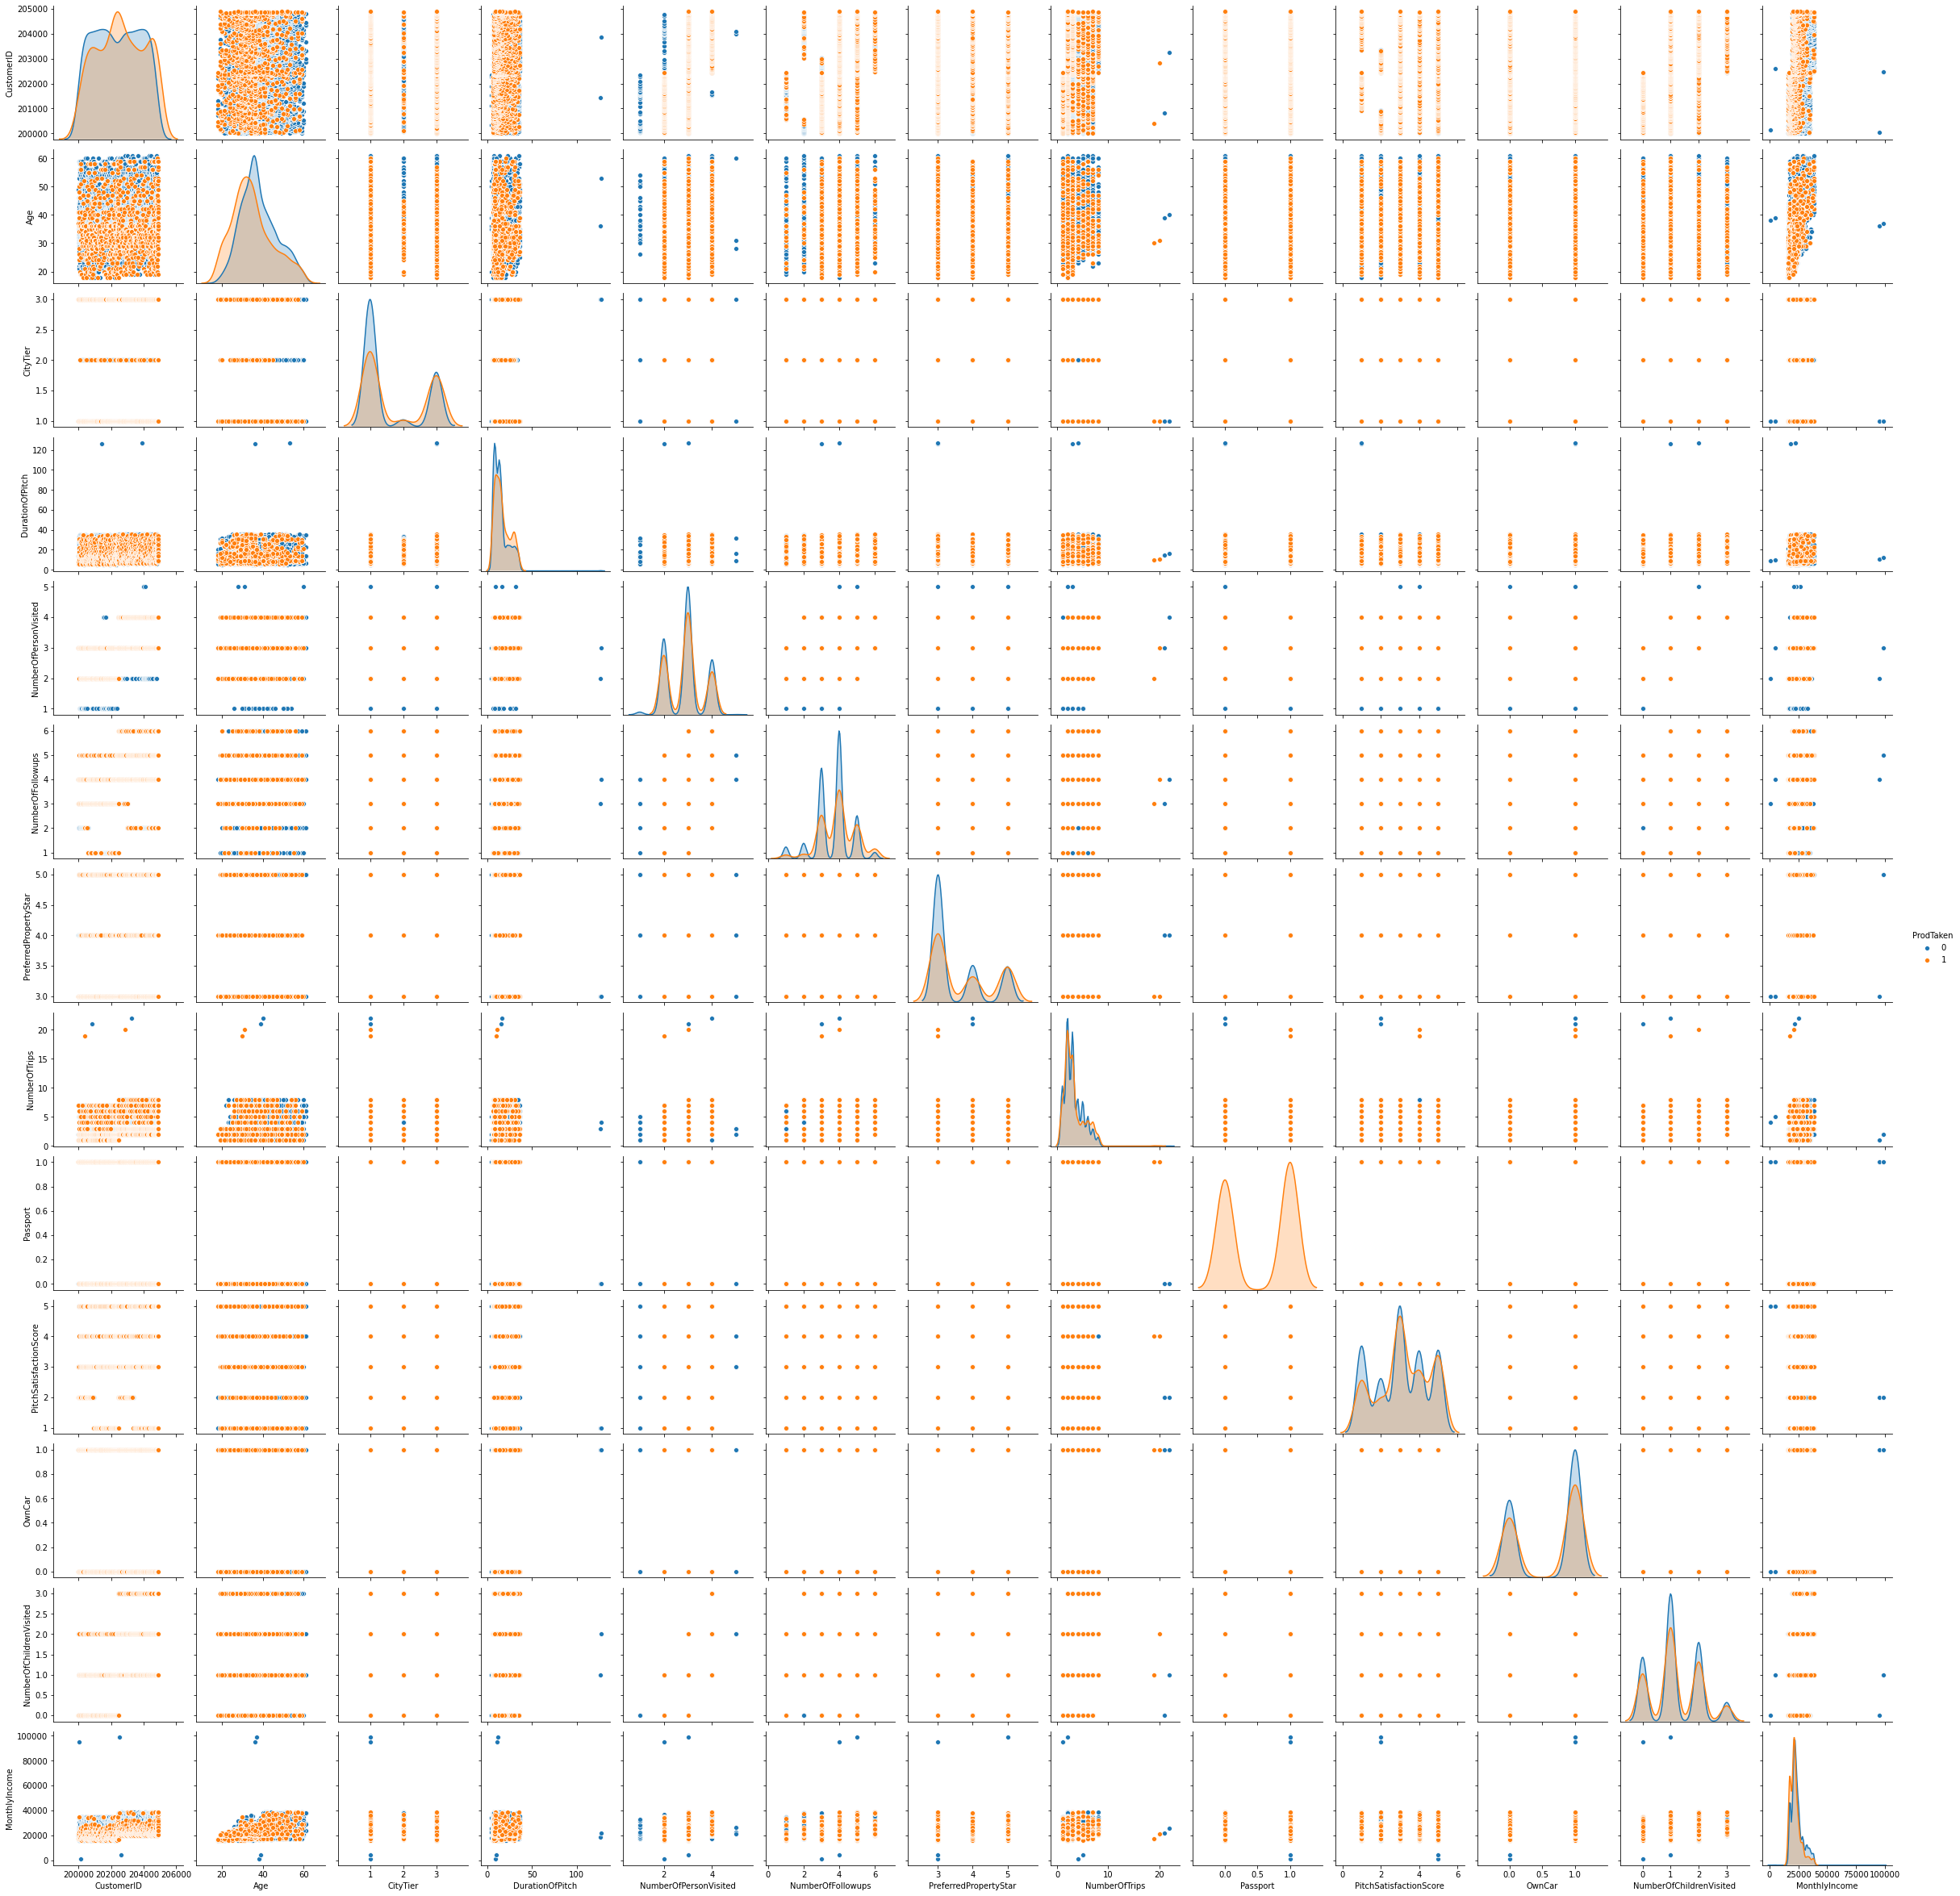

In [63]:
sns.pairplot(data=df,hue="ProdTaken")
plt.show()

# ProdTaken Vs MaritalStatus using barplots:

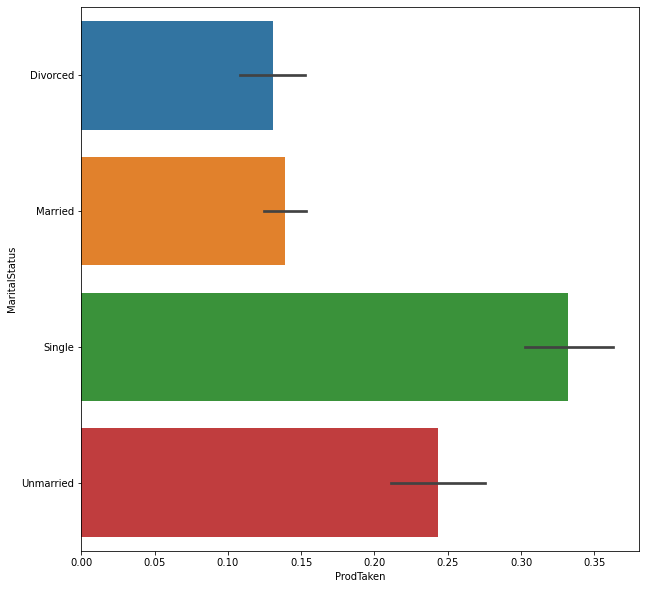

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(df['ProdTaken'],df['MaritalStatus'])
plt.show()

Maximum of the products taken are by the customers who are single and unmarried.

# Gender Vs Passport using barplots:

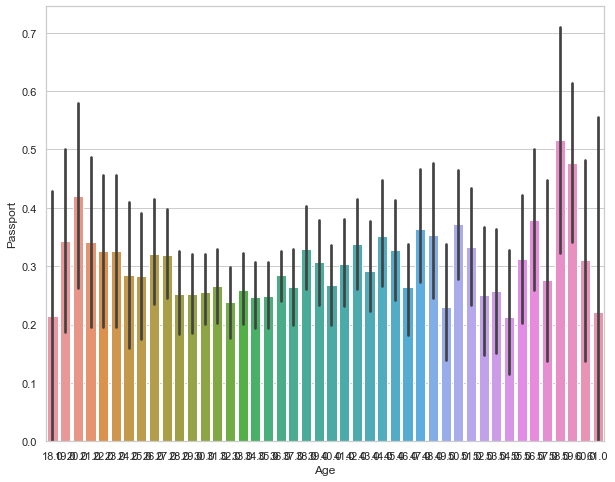

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(df['Age'],df['Passport'])
plt.show()

# ProdTaken Vs PreferredLoginDevice using barplots:

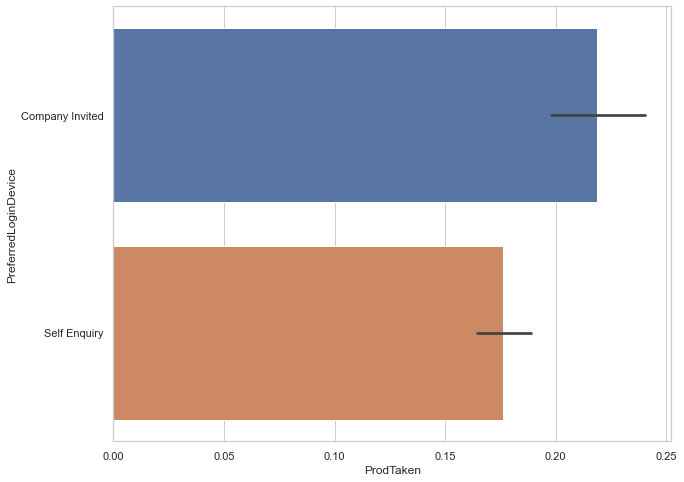

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(df['ProdTaken'],df['PreferredLoginDevice'])
plt.show()

* Customers prefer company invited more than Self Enquiry.

# Prod Taken Vs Income Vs Age using ScatterPlots

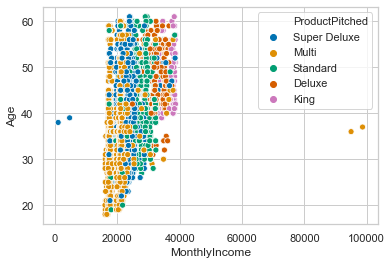

In [68]:
sns.scatterplot(x = "MonthlyIncome", y = "Age", hue='ProductPitched' ,data = df, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

Observations:
* Customers of younger age takes more prouct packages purchased compared to the older age ones.

# Prod Taken Vs Income Vs ProductPitched using ScatterPlots

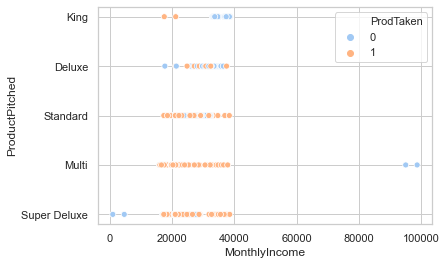

In [67]:
sns.scatterplot(x = "MonthlyIncome", y = "ProductPitched", hue='ProdTaken' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

* The most common product  packages  taken by customers are Standard, Multi and Super Deluxe. 
* Customers with a salary of 20000 to 40000 goes for the purchase of packages  Standard, Multi and Super Deluxe.

# Prod Taken Vs NumberOfFollowups Vs ProductPitched using ScatterPlots

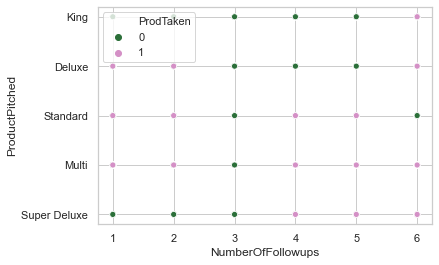

In [70]:
sns.scatterplot(x = "NumberOfFollowups", y = "ProductPitched", hue='ProdTaken' ,data = df, palette='cubehelix')
sns.set(style='whitegrid')
plt.show()

# Prod Taken Vs NumberOfTrips Vs ProductPitched using ScatterPlots

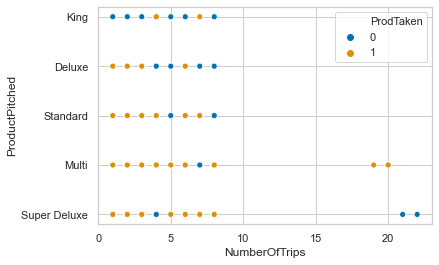

In [72]:
sns.scatterplot(x = "NumberOfTrips", y = "ProductPitched", hue='ProdTaken' ,data = df, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

* Based upon the ablove observations , at the maximum of about 10 trips were taken by the customers for the purchase of the products

# Maritalstatus Vs Age Vs Passport using ScatterPlots

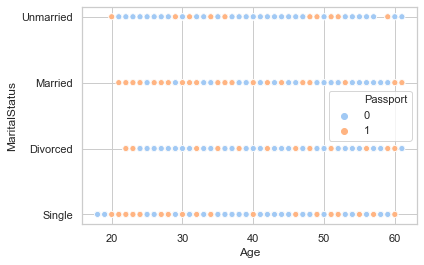

In [76]:
sns.scatterplot(x = "Age", y = "MaritalStatus", hue='Passport' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Age Vs Gender Vs Passport using ScatterPlots

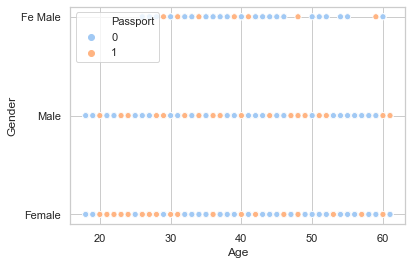

In [85]:
sns.scatterplot(x = "Age", y = "Gender", hue='Passport' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

Observations:
    * Based upon the above observations with comparison to Passport holders or not , Most of the current customrs dont  have a passport . Only a handful possess a passport .

# Data Pre-processing

In [73]:
#Dropping values which dont have much impact to this data model:
df = df.drop(['CustomerID'],axis=1) 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4888 non-null   float64 
 2   PreferredLoginDevice     4863 non-null   category
 3   CityTier                 4888 non-null   int64   
 4   DurationOfPitch          4888 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   int64   
 8   NumberOfFollowups        4888 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4888 non-null   float64 
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4888 non-null   float64 
 13  Passport                 4888 non-null   int64   
 14  PitchSat


* Both the Occupation and Designation columns mean the same. So we can go about dropping any one of the columns .

 * CityTier and  DurationOfPitch columns dont give much imapct to the model so we will drop those columns.

In [ ]:
df = df.drop(['CityTier'],axis=1) 
df = df.drop(['DurationOfPitch'],axis=1) 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4888 non-null   float64 
 2   PreferredLoginDevice     4863 non-null   category
 3   Occupation               4888 non-null   category
 4   Gender                   4888 non-null   category
 5   NumberOfPersonVisited    4888 non-null   int64   
 6   NumberOfFollowups        4888 non-null   float64 
 7   ProductPitched           4888 non-null   category
 8   PreferredPropertyStar    4888 non-null   float64 
 9   MaritalStatus            4888 non-null   category
 10  NumberOfTrips            4888 non-null   float64 
 11  Passport                 4888 non-null   int64   
 12  PitchSatisfactionScore   4888 non-null   int64   
 13  OwnCar                   4888 non-null   int64   
 14  NumberOf

In [94]:
df = df.drop(['Designation','PreferredLoginDevice', 'NumberOfChildrenVisited'],axis=1) 

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ProdTaken               4888 non-null   int64   
 1   Age                     4888 non-null   float64 
 2   Occupation              4888 non-null   category
 3   Gender                  4888 non-null   category
 4   NumberOfPersonVisited   4888 non-null   int64   
 5   NumberOfFollowups       4888 non-null   float64 
 6   ProductPitched          4888 non-null   category
 7   PreferredPropertyStar   4888 non-null   float64 
 8   MaritalStatus           4888 non-null   category
 9   NumberOfTrips           4888 non-null   float64 
 10  Passport                4888 non-null   int64   
 11  PitchSatisfactionScore  4888 non-null   int64   
 12  OwnCar                  4888 non-null   int64   
 13  MonthlyIncome           4888 non-null   float64 
dtypes: category(4), float64(

In [97]:
df.head()

,ProdTaken,Age,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome
0,1,41.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,20993.0
1,0,49.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,20130.0
2,1,37.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,17090.0
3,0,33.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,17909.0
4,0,36.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,18468.0


In [98]:
dummy_data = pd.get_dummies(df)
dummy_data.head()

,ProdTaken,Age,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,...,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Multi,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,1,41.0,3,3.0,3.0,1.0,1,2,1,20993.0,...,0,0,0,0,0,1,0,0,1,0
1,0,49.0,3,4.0,4.0,2.0,0,3,1,20130.0,...,1,0,0,0,0,1,1,0,0,0
2,1,37.0,3,4.0,3.0,7.0,1,3,0,17090.0,...,1,0,0,1,0,0,0,0,1,0
3,0,33.0,2,3.0,3.0,2.0,1,5,1,17909.0,...,0,0,0,1,0,0,1,0,0,0
4,0,36.0,2,3.0,4.0,1.0,0,5,1,18468.0,...,1,0,0,1,0,0,1,0,0,0


In [99]:
column_names = list(df)
column_names.remove('ProdTaken')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome']


In [100]:
X = dummy_data.drop('ProdTaken',axis=1)                                                 # Features
y = dummy_data['ProdTaken']

In [101]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3421, 25) (1467, 25)


*  We have 3421 observations in the train set and 1467 observations in the test set.

# Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use same codes repeatedly.

In [103]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

# <a id = "link4"></a>Decision Tree Model

In [104]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [105]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.23817711819419762
RMSE on training set :  0.0
RMSE on test set :  0.3502847220520294


- Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

In [106]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=1)

In [107]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.2581493633889238
R-square on test set :  0.1802617558873939
RMSE on training set :  0.33261642446242756
RMSE on test set :  0.3633555413649049


- The overfitting is reduced after hyperparameter tuning and trainscore matches with the test score.
- RMSE is also reduced on test data but it can be still better .

# Plotting the feature importance of each variable

In [108]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.304715
ProductPitched_Multi         0.258161
Age                          0.122286
NumberOfFollowups            0.055522
NumberOfTrips                0.053982
PitchSatisfactionScore       0.044699
MaritalStatus_Married        0.036801
Gender_Female                0.032319
PreferredPropertyStar        0.030969
Occupation_Small Business    0.015180
MaritalStatus_Divorced       0.014857
Occupation_Large Business    0.011381
Gender_Male                  0.010529
NumberOfPersonVisited        0.008598
Occupation_Salaried          0.000000
Gender_Fe Male               0.000000
Occupation_Free Lancer       0.000000
ProductPitched_Deluxe        0.000000
ProductPitched_King          0.000000
MonthlyIncome                0.000000
ProductPitched_Standard      0.000000
ProductPitched_Super Deluxe  0.000000
OwnCar                       0.000000
MaritalStatus_Single         0.000000
MaritalStatus_Unmarried      0.000000


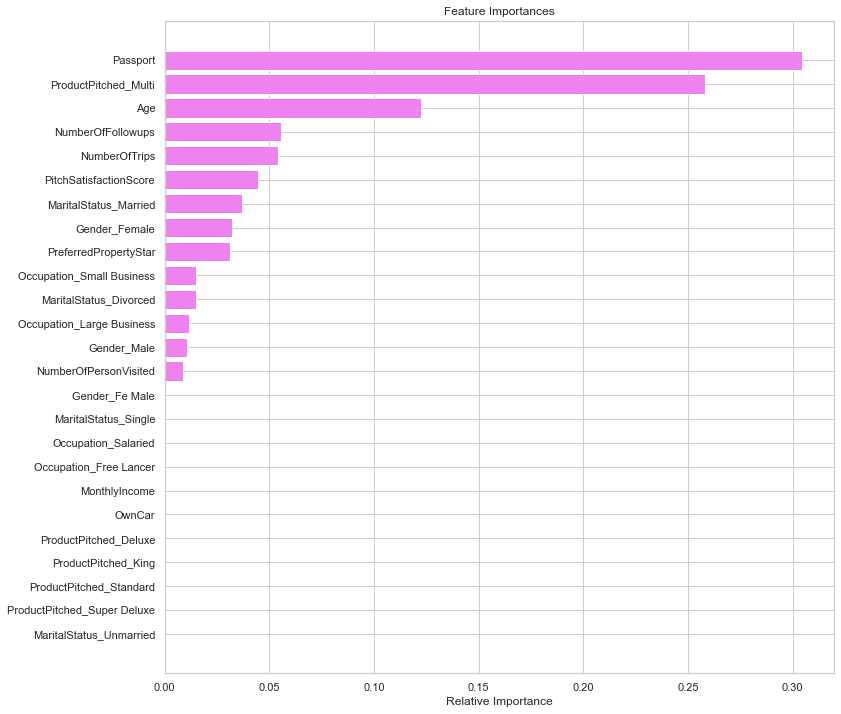

In [109]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- passport is the most important feature, in addition to Products Pitched and Age, for tuned decision tree model

# <a id = "link5"></a>Random Forest Model

In [110]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [111]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9276160315424952
R-square on test set :  0.5152770711680938
RMSE on training set :  0.10389787106485586
RMSE on test set :  0.27940937317612946


- Random forest is giving good r2 score of 92% on the train data but test data is slightly overfitting the train data
- Let's try to reduce this overfitting by hyperparameter tuning.

In [114]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=120, random_state=1)

In [115]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9270875096018246
R-square on test set :  0.47359155737184666
RMSE on training set :  0.10427649379295002
RMSE on test set :  0.29117602449381236


In [116]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.171572
Age                          0.151378
Passport                     0.091789
NumberOfTrips                0.078218
PitchSatisfactionScore       0.075336
NumberOfFollowups            0.069100
PreferredPropertyStar        0.048988
ProductPitched_Multi         0.038448
NumberOfPersonVisited        0.037414
OwnCar                       0.025959
MaritalStatus_Single         0.023731
Gender_Male                  0.022548
Occupation_Small Business    0.020527
Occupation_Salaried          0.020113
Gender_Female                0.019666
MaritalStatus_Married        0.019505
ProductPitched_Super Deluxe  0.017201
Occupation_Large Business    0.015557
MaritalStatus_Unmarried      0.015222
MaritalStatus_Divorced       0.012191
ProductPitched_Standard      0.010878
ProductPitched_Deluxe        0.006392
Gender_Fe Male               0.004361
ProductPitched_King          0.003528
Occupation_Free Lancer       0.000375


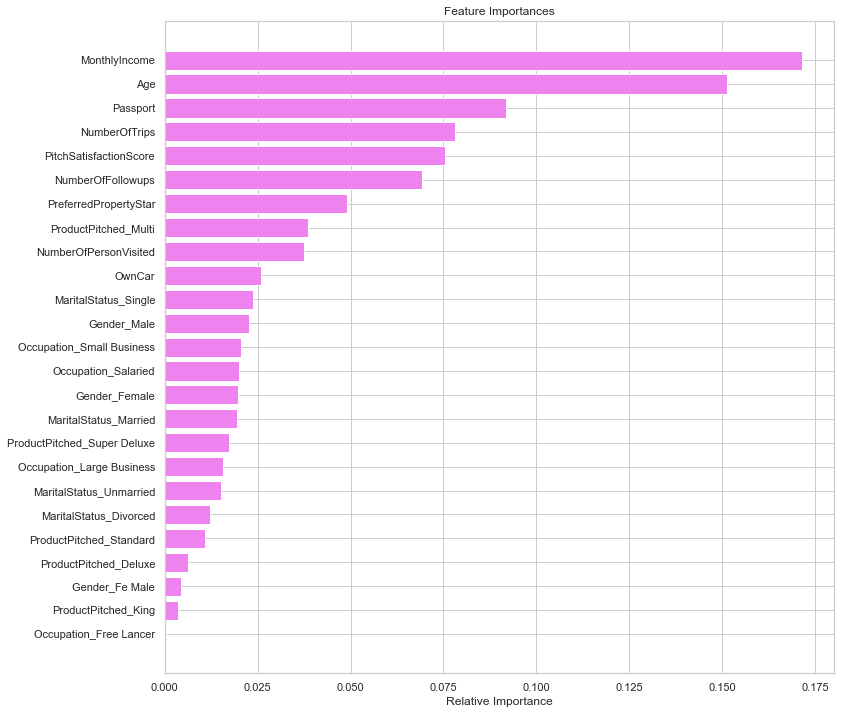

In [117]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income  is the most important feature, in addition to Age and Passport, for the tuned random forest model.

# <a id = "link6"></a>Boosting Models

### AdaBoost Regressor

In [119]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [120]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.16438794593886608
R-square on test set :  0.1380829931794222
RMSE on training set :  0.35301064521892644
RMSE on test set :  0.3725863277909052


### Hyperparameter Tuning

In [121]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=80, random_state=1)

In [122]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.20229952728878275
R-square on test set :  0.15119285136554295
RMSE on training set :  0.3449096763435805
RMSE on test set :  0.3697419296932171


In [123]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.389488
ProductPitched_Multi         0.275125
Age                          0.114707
NumberOfFollowups            0.052490
PreferredPropertyStar        0.036283
MaritalStatus_Married        0.036191
MaritalStatus_Single         0.032064
MonthlyIncome                0.017078
PitchSatisfactionScore       0.014666
MaritalStatus_Unmarried      0.008915
Gender_Female                0.007536
Occupation_Large Business    0.005532
NumberOfTrips                0.003325
Occupation_Small Business    0.002144
Gender_Male                  0.001798
Occupation_Salaried          0.001635
ProductPitched_Super Deluxe  0.000858
ProductPitched_Standard      0.000164
NumberOfPersonVisited        0.000000
Gender_Fe Male               0.000000
ProductPitched_Deluxe        0.000000
ProductPitched_King          0.000000
Occupation_Free Lancer       0.000000
MaritalStatus_Divorced       0.000000
OwnCar                       0.000000


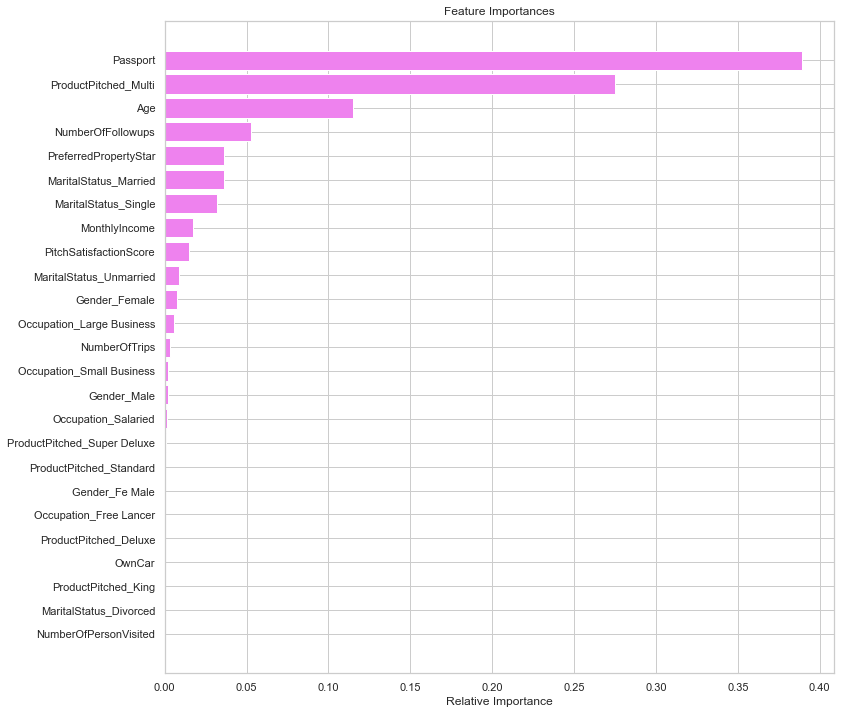

In [124]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport  is the most important feature, in addition to Age and ProductPitchedMulti, for the Ada Boost Model.

# Gradient Boosting Regressor

In [125]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [126]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.3818649989352584
R-square on test set :  0.27687499605301835
RMSE on training set :  0.3036177249102863
RMSE on test set :  0.34127217361413725


In [130]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=0.7, n_estimators=175,
                          random_state=1, subsample=0.9)

In [129]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.9998690910345822
R-square on test set :  0.5851689227495936
RMSE on training set :  0.0044184520790238515
RMSE on test set :  0.2584817178872668


In [132]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.197528
Age                          0.163318
Passport                     0.083108
PitchSatisfactionScore       0.072477
NumberOfTrips                0.072127
NumberOfFollowups            0.068400
ProductPitched_Multi         0.053303
PreferredPropertyStar        0.039526
NumberOfPersonVisited        0.026798
MaritalStatus_Single         0.025823
Gender_Female                0.025104
OwnCar                       0.020223
Gender_Male                  0.020180
Occupation_Small Business    0.019772
MaritalStatus_Unmarried      0.017606
MaritalStatus_Married        0.015705
Occupation_Large Business    0.015115
Occupation_Salaried          0.014936
ProductPitched_Super Deluxe  0.014097
MaritalStatus_Divorced       0.012147
ProductPitched_Standard      0.009183
ProductPitched_Deluxe        0.007897
Gender_Fe Male               0.003513
ProductPitched_King          0.001593
Occupation_Free Lancer       0.000524


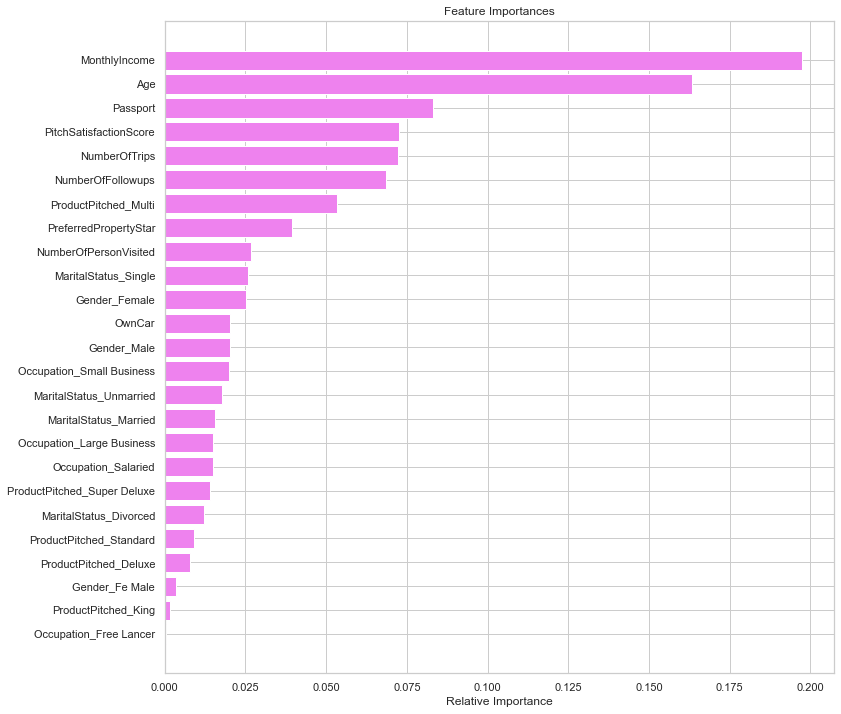

In [133]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly Income is the most important feature, in addition to Age and Passport, for the GradientBoosting Model.

### XGBoost Regressor

In [134]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.921812800552187
R-square on test set :  0.4662503325206422
RMSE on training set :  0.10798247629297013
RMSE on test set :  0.2931993464793473


In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

In [ ]:
xgb_tuned_score=get_model_score(xgb_tuned)

# <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_score=get_model_score(stacking_estimator)

# Business Recommendations:

* The Passport followed by the Age and ProductPitchedMulti are the most important features ith the basis of comparison of Decsion tree, Boosting and Random Tree models.
* As customer is alllowed to travel for the Wellness Tourism Package< having passport has become the majorfeature in this dataset.
* Customers at the Age between 30 to 40 can be targeted more on the purchase of this package as per the previous customer model.
